In [183]:
# Data: https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv

In [46]:
import sklearn
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [5]:
data = pd.read_csv('/content/emails.csv')
data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [6]:
data.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [11]:
data.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [56]:
non_spam_count = data[data['spam'] == 0].shape[0]
spam_count = data[data['spam'] == 1].shape[0]
total_emails = data.shape[0]
print(non_spam_count, spam_count)

5104 57


In [22]:
spam_percentage = (spam_count / total_emails) * 100
non_spam_percentage = (non_spam_count / total_emails) * 100

print("% of spam emails: {:.2f}%".format(spam_percentage))
print("% of non-spam emails: {:.2f}%".format(non_spam_percentage))
# class imbalance

% of spam emails: 1.10%
% of non-spam emails: 98.69%


In [44]:
# data.sum(axis=1)

In [53]:
not_spam_df = data[data['spam'] == 0].drop(['Email No.'], axis=1)
spam_df = data[data['spam'] == 1].drop(['Email No.'], axis=1)

In [61]:
train_not_spam = not_spam_df.iloc[:4104]
test_not_spam = not_spam_df.iloc[4104:]

train_spam = spam_df.iloc[:46]
test_spam = spam_df.iloc[46:]

In [62]:
train_not_spam.shape, test_not_spam.shape, train_spam.shape, test_spam.shape

((4104, 3001), (1000, 3001), (46, 3001), (11, 3001))

In [65]:
f = [train_not_spam, train_spam]
train_df = pd.concat(f)

ff = [test_not_spam, test_spam]
test_df = pd.concat(ff)

train_df.shape, test_df.shape

((4150, 3001), (1011, 3001))

In [66]:
train_x = train_df.drop(['spam'], axis=1)
train_y = train_df['spam']

test_x = test_df.drop(['spam'], axis=1)
test_y = test_df['spam']

In [71]:
# 3000 features, binary cls

In [72]:
clf = LogisticRegression(random_state=0).fit(train_x, train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [73]:
pred = clf.predict(test_x)

In [76]:
accuracy_score(test_y, pred)

0.9950544015825915

In [78]:
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       0.88      0.64      0.74        11

    accuracy                           1.00      1011
   macro avg       0.94      0.82      0.87      1011
weighted avg       0.99      1.00      0.99      1011



In [79]:
clf.score(train_x, train_y)

1.0

In [84]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

X = data.drop(['spam', 'Email No.'], axis=1)
y = data['spam']

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X, y)

importances = rf.feature_importances_

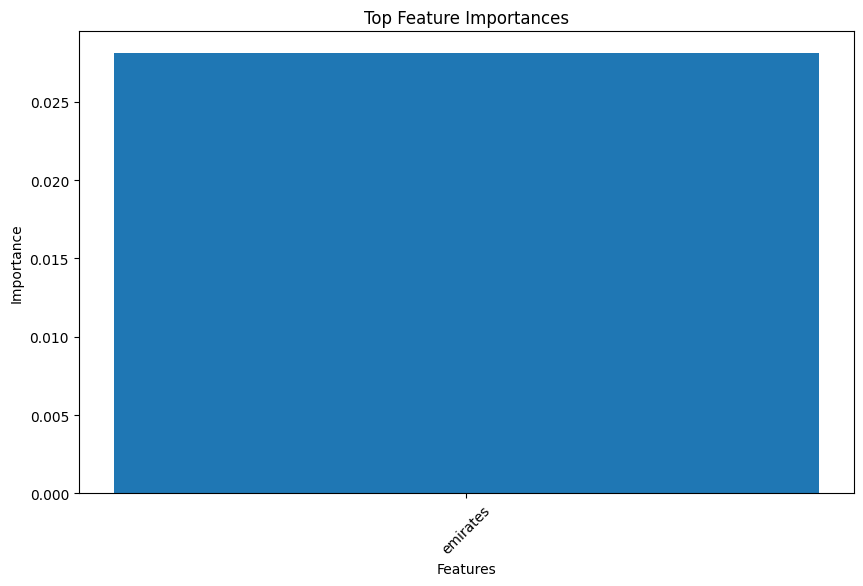

In [160]:
top_k = 1
indices = importances.argsort()[-top_k:][::-1]
feature_names = X.columns[indices]

plt.figure(figsize=(10, 6))
plt.bar(feature_names, importances[indices])
plt.title('Top Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

In [161]:
keep = list(feature_names)

In [162]:
all = list(data.columns)

In [163]:
drop = list(set(all) - set(keep))

In [164]:
len(all), len(keep), len(drop)

(3002, 1, 3001)

In [165]:
drop.remove('spam')

In [166]:
'spam' in drop

False

In [167]:
not_spam_df = data[data['spam'] == 0].drop(drop, axis=1)
spam_df = data[data['spam'] == 1].drop(drop, axis=1)

In [168]:
train_not_spam = not_spam_df.iloc[:4104]
test_not_spam = not_spam_df.iloc[4104:]

train_spam = spam_df.iloc[:46]
test_spam = spam_df.iloc[46:]

In [169]:
train_not_spam.shape, test_not_spam.shape, train_spam.shape, test_spam.shape

((4104, 2), (1000, 2), (46, 2), (11, 2))

In [170]:
f = [train_not_spam, train_spam]
train_df = pd.concat(f)

ff = [test_not_spam, test_spam]
test_df = pd.concat(ff)

train_df.shape, test_df.shape

((4150, 2), (1011, 2))

In [171]:
train_x = train_df.drop(['spam'], axis=1)
train_y = train_df['spam']

test_x = test_df.drop(['spam'], axis=1)
test_y = test_df['spam']

In [172]:
clf = LogisticRegression(random_state=0).fit(train_x, train_y)

In [173]:
pred = clf.predict(test_x)

In [174]:
accuracy_score(test_y, pred)

0.9970326409495549

In [175]:
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       1.00      0.73      0.84        11

    accuracy                           1.00      1011
   macro avg       1.00      0.86      0.92      1011
weighted avg       1.00      1.00      1.00      1011



In [178]:
data[['emirates', 'spam']]

,emirates,spam
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
5167,0,0
5168,0,0
5169,0,0
5170,0,0


In [180]:
data[(data['emirates'] == 0) & (data['spam'] == 0)].shape[0]

5104

In [182]:
data[(data['emirates'] == 1) & (data['spam'] == 1)].shape[0]

37

In [185]:
data[(data['emirates'] == 1) & (data['spam'] == 0)].shape[0]

0

In [186]:
data[(data['emirates'] == 0) & (data['spam'] == 1)].shape[0]

20

In [187]:
# Just 1 feature is enough to get 99.7% accuracy on this data out of 3001 features